# Pima Indians Diabetes

## 1. Định nghĩa vấn đề (Define Problem)
+ **Mô tả**:
    + Bộ dữ liệu chứa thông tin sức khỏe của 768 phụ nữ người Pima (Arizona, Mỹ), từ 21 tuổi trở lên.
    + Mục tiêu là dự đoán một người có mắc bệnh tiểu đường type 2 hay không dựa trên các đặc trưng y tế.
+ **Dữ liệu vào**:
    + Pregnancies: số lần mang thai
    + Glucose: nồng độ glucose huyết tương sau nghiệm pháp dung nạp glucose (mg/dl)
    + BloodPressure: huyết áp tâm trương (mm Hg)
    + SkinThickness: độ dày nếp gấp da (mm)
    + Insulin: insulin huyết thanh 2 giờ (mu U/ml)
    + BMI: chỉ số khối cơ thể = cân nặng / (chiều cao²)
    + DiabetesPedigreeFunction: chỉ số di truyền tiểu đường (gia đình)
    + Age: tuổi (năm)
+ **Kết quả**:
    + Outcome (cột thứ 9):
        + 0 = không bị tiểu đường
        + 1 = bị tiểu đường

# Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [1]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### 2.2. Nạp dữ liệu (Load Dataset)

In [2]:
data_path = r"pima-indians-diabetes.data.csv"

data_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

df_dataset = pd.read_csv(data_path, names=data_names)
print("Kích thước dữ liệu:", df_dataset.shape)
display.display(df_dataset.head())


Kích thước dữ liệu: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [3]:
# shape
print(f'+ Shape: {df_dataset.shape}')
# types
print(f'+ Data Types: \n{df_dataset.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))
# info
df_dataset.info()

+ Shape: (768, 9)
+ Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
+ Contents: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**:
+ Kích thước dữ liệu: gồm 768 mẫu (hàng) và 9 thuộc tính (cột).
+ Kiểu dữ liệu: hầu hết các thuộc tính là số nguyên (int64), riêng BMI và DiabetesPedigreeFunction là số thực (float64).
+ Cấu trúc dữ liệu: các thuộc tính phản ánh đặc điểm sức khỏe như số lần mang thai, nồng độ glucose, huyết áp, BMI, tuổi… và nhãn Outcome cho biết có mắc tiểu đường hay không.
+ Giá trị bất thường/thiếu tiềm ẩn: một số cột như Insulin, SkinThickness, BloodPressure có nhiều giá trị bằng 0 → điều này không thực tế về mặt y học (cần xử lý trước khi phân tích).
+ Biến mục tiêu: Outcome là nhãn phân loại nhị phân (0 = không bị tiểu đường, 1 = bị tiểu đường), phù hợp cho các mô hình học máy supervised classification.

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [4]:
# Kiểm tra tính toàn vẹn dữ liệu cho Pima Indians Diabetes
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()

print("Tính toàn vẹn dữ liệu:")

# Null
print(f"+ Có giá trị Null: {has_null}")
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])

# NaN
print(f"+ Có giá trị NaN: {has_nan}")
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

# Duplicated
print(f"+ Số dòng trùng: {n_duplicated}")
if n_duplicated > 0:
    display.display(df_dataset[df_dataset.duplicated()])


Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị NaN: False
+ Số dòng trùng: 0


**Nhận xét**:
+ Bộ dữ liệu không có giá trị Null
+ Không tồn tại giá trị NaN
+ Không có dòng trùng lặp

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [5]:
description = df_dataset.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Nhận xét**:
+ Bộ dữ liệu có 768 quan sát, đầy đủ cho phân tích.
+ Một số cột có giá trị 0 bất thường (Glucose, BloodPressure, SkinThickness, Insulin)
+ Glucose trung bình khoảng 120, có nhiều giá trị cao, phù hợp phân biệt người tiểu đường.
+ BMI trung bình lớn hơn 30, nhiều đối tượng thừa cân.
+ Age trải rộng từ 21 đén 81 tuổi, tập trung vào nhóm trung niên.

#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [6]:
df_dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Nhận xét**:
+ Thuộc tính Outcome có 500 mẫu lớp 0 (không tiểu đường) và 268 mẫu lớp 1 (tiểu đường).
+ Tỉ lệ tương ứng khoảng 65% : 35%.

#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả. 

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn. 

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

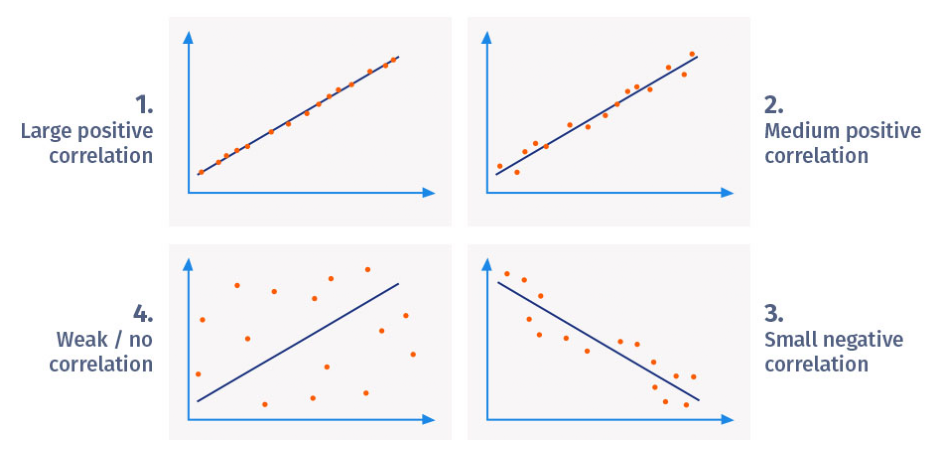

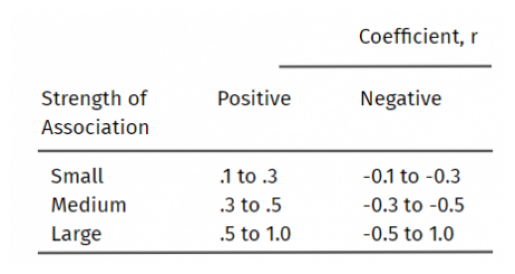

In [7]:
plt.figure(figsize=(12, 6));
plt.imshow(plt.imread("corr1.png")), plt.axis("off"), plt.show();
plt.imshow(plt.imread("corr2.png")), plt.axis("off"), plt.show();

In [8]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét**:  
+ Các cặp tính chất có độ tương quan cao hơn so với các cặp khác:  
  + (Glucose, Outcome) ≈ 0.47  
  + (BMI, Outcome) ≈ 0.29  
  + (Age, Outcome) ≈ 0.24  
+ Các thuộc tính khác (BloodPressure, Insulin, SkinThickness) có hệ số tương quan thấp → ảnh hưởng ít trực tiếp đến Outcome.  
+ Không có cặp biến nào có tương quan quá cao → ít nguy cơ đa cộng tuyến.  


### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

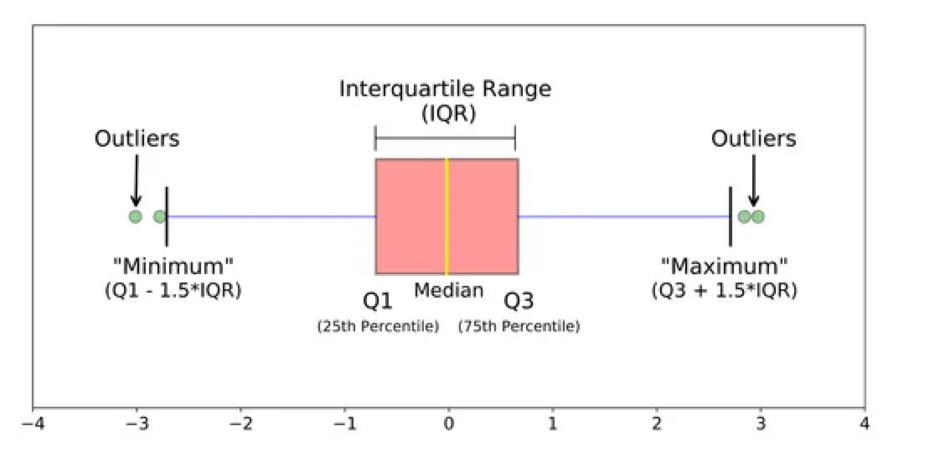

In [9]:
plt.figure(figsize=(12, 6)), plt.imshow(plt.imread("boxplots.png")), plt.axis("off"), plt.show();

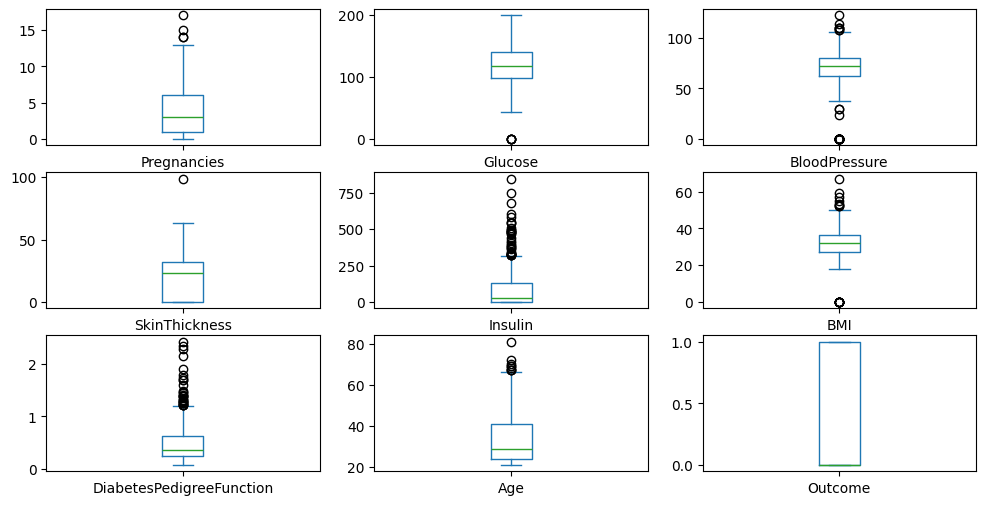

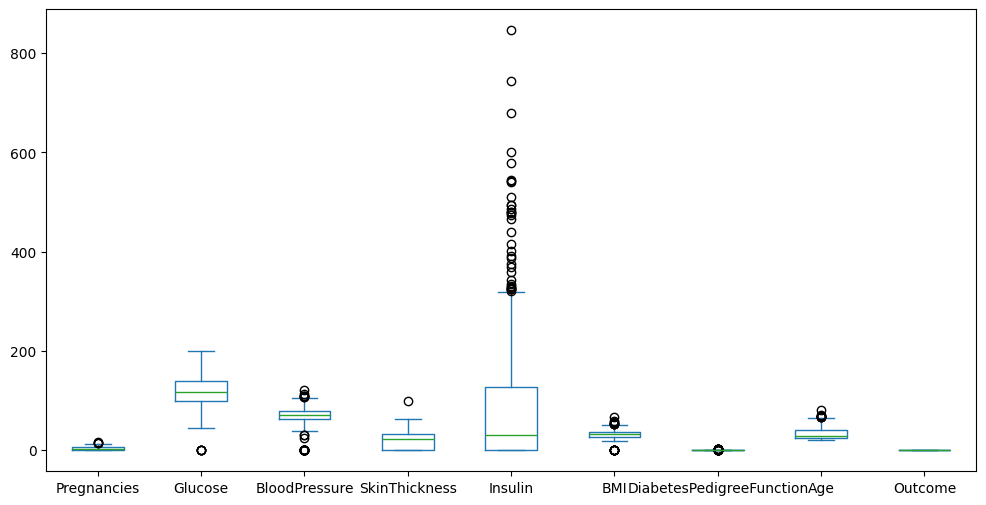

In [10]:
df_dataset.plot(kind="box", subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(12,6));
df_dataset.plot(kind="box", figsize=(12,6));

**Biểu đồ Histogram**

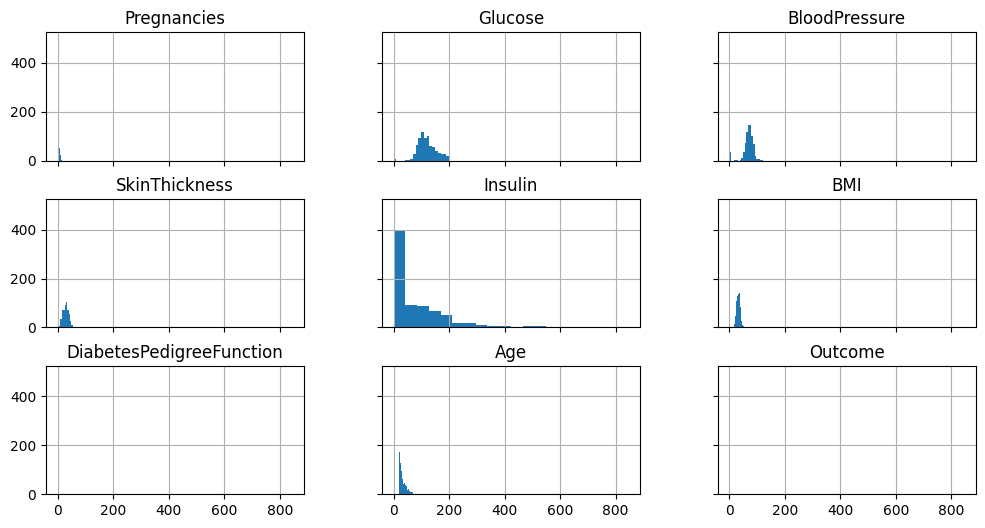

In [11]:
df_dataset.hist(figsize=(12, 6), bins=20, sharex=True, sharey=True);

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

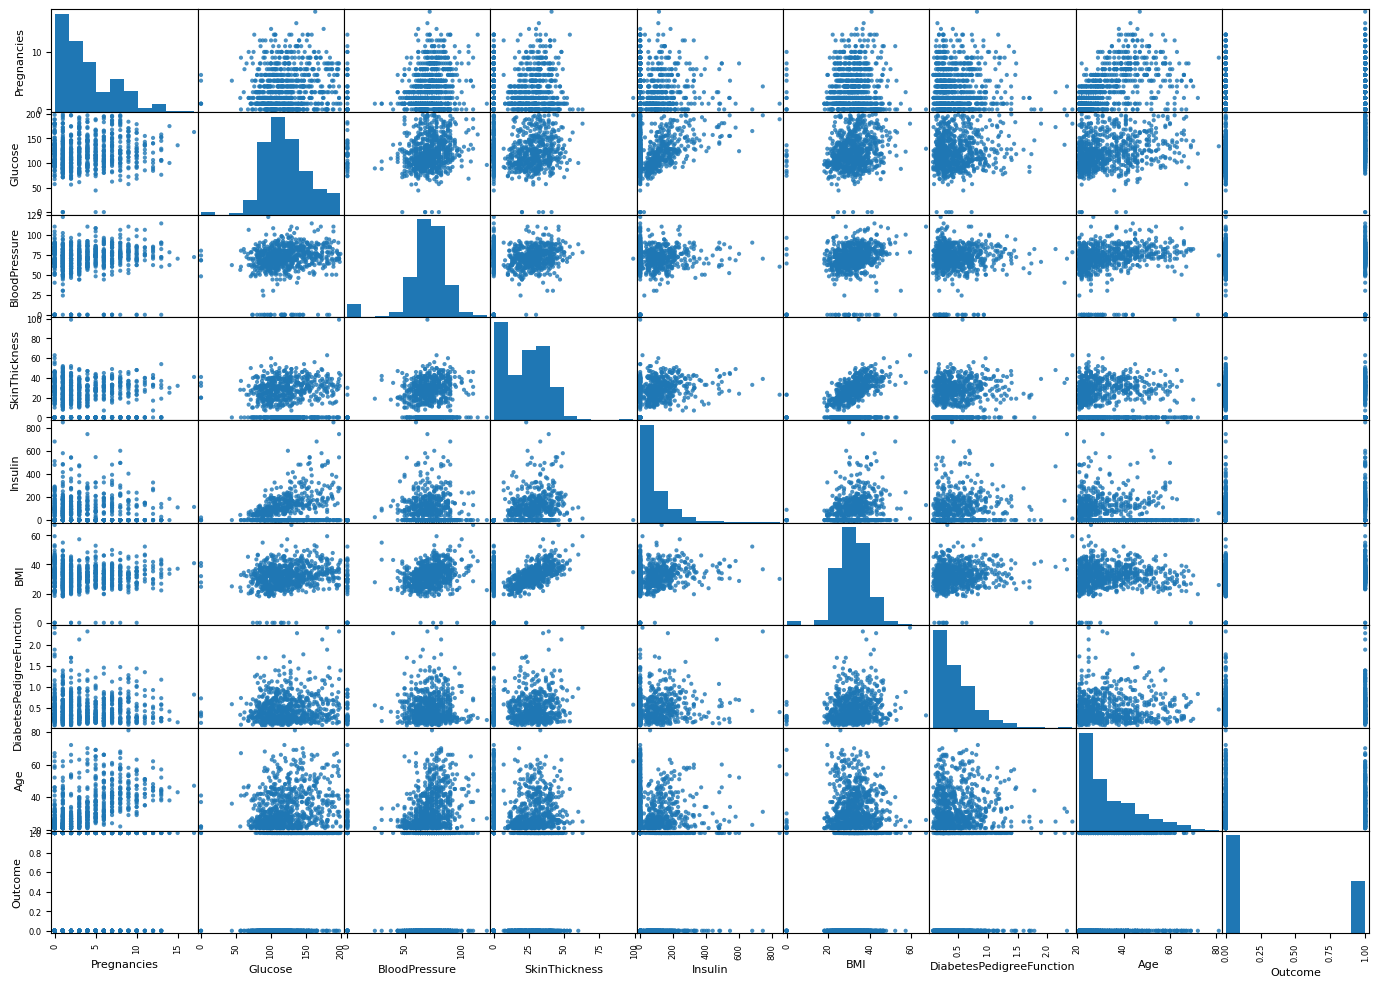

In [12]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(df_dataset, figsize=(17,12), diagonal='hist', alpha=0.8)

# chỉnh kích thước font chữ của nhãn trục
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='both', labelsize=6)  # chỉnh font tick nhỏ lại
plt.show()


+ Các cặp tính chất có độ tương quan cao hơn các cặp khác:  
    + (Glucose, Outcome) ≈ 0.47  
    + (BMI, Outcome) ≈ 0.29  
    + (Age, Outcome) ≈ 0.24  

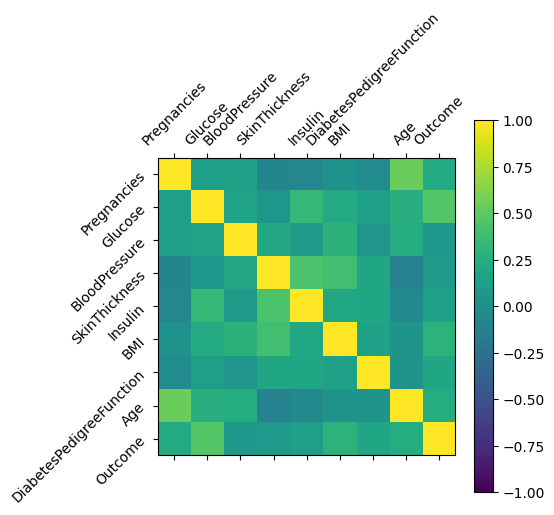

In [13]:
correlations = df_dataset.corr()

plt.matshow(correlations, vmin=-1, vmax=1)
plt.colorbar()

n = len(df_dataset.columns)

plt.xticks(np.arange(n), df_dataset.columns, rotation=45, fontsize=10)
plt.yticks(np.arange(n), df_dataset.columns, rotation=45, fontsize=10)

plt.show()

## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [14]:
df_clean = df_dataset.copy()
print("Kích thước dữ liệu sau khi chọn cột:", df_clean.shape)

Kích thước dữ liệu sau khi chọn cột: (768, 9)


#### (2) **Xóa dữ liệu trùng nhau**

In [15]:
display.display(df_dataset[df_dataset.duplicated()])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [16]:
display.display(df_dataset[df_dataset.isnull().any(axis=1)])
display.display(df_dataset[df_dataset.isna().any(axis=1)])
display.display(df_dataset[df_dataset.duplicated()])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [17]:
df_clean.drop_duplicates(ignore_index=True, inplace=True)
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### (3) **Xử lý giá trị rỗng, không hợp lệ**

In [18]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


##### Example
Nếu có dữ liệu Null, hay Nan thì chúng ta có các cách giải quyết sau:
+ Chúng ta xóa bỏ cột tính chất vi phạm: 

```python
df_clean.drop("cột_vi_phạm", axis=1)
```
+ Chúng ta xóa bỏ các dòng vi phạm: 

```python
df_clean.dropna(subset=["cột_vi_phạm", ...])
```

+ Điền giá trị hằng số (như số 0), hoặc nội suy bằng phần tử median:

```python
median = df_clean["cột_vi_phạm"].median()
df_clean["cột_vi_phạm"].fillna(median, inplace=True)
```

In [19]:
# Example:
df_example = pd.read_csv("Data.csv")
df_example

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [20]:
# Chúng ta xóa bỏ cột tính chất vi phạm
df_example.drop("Salary", axis = 1)

,Country,Age,Purchased
0,France,44.0,No
1,Spain,27.0,Yes
2,Germany,30.0,No
3,Spain,38.0,No
4,Germany,40.0,Yes
5,France,35.0,Yes
6,Spain,NaN,No
7,France,48.0,Yes
8,Germany,50.0,No
9,France,37.0,Yes


In [21]:
# Chúng ta xóa bỏ các dòng vi phạm
df_example.dropna(subset=["Salary", "Age"])

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [22]:
# Điền giá trị hằng số (cho cột Age) hoặc median (cho cột Salary)
df_example["Age"].fillna(0, inplace=True)
median = df_example["Salary"].median()
df_example["Salary"].fillna(median, inplace=True)
df_example

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,0.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### 4.2. Biến đổi dữ liệu (Data Transforms)

#### (1) Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

In [23]:
class_encoder = LabelEncoder()
class_encoder.fit(df_clean["Outcome"])
class_names = class_encoder.classes_
print(class_names)

[0 1]


In [24]:
class_encoder.transform(df_clean["Outcome"])

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [25]:
df_clean["Outcome"] = class_encoder.transform(df_clean["Outcome"])
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


##### Example

In [26]:
purchased_encoder = LabelEncoder()
purchased_encoder.fit(df_example["Purchased"])
purchased_names = purchased_encoder.classes_
print(purchased_names)
print(purchased_encoder.transform(df_example["Purchased"]))

['No' 'Yes']
[0 1 0 0 1 1 0 1 0 1]


In [27]:
df_example["Purchased"] = purchased_encoder.transform(df_example["Purchased"])
df_example

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,61000.0,1
5,France,35.0,58000.0,1
6,Spain,0.0,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,France,37.0,67000.0,1


#### (2) Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn. 

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

In [28]:
# Áp dụng cho cột country
df_contry_onehot = pd.get_dummies(df_example["Country"])
df_contry_onehot

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,True,False
5,True,False,False
6,False,False,True
7,True,False,False
8,False,True,False
9,True,False,False


In [29]:
df_contry_onehot = pd.DataFrame(df_contry_onehot.values, 
                                columns=["Is_France", "Is_Germany", "Is_Spain"])
df_contry_onehot

,Is_France,Is_Germany,Is_Spain
0,True,False,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,True,False
5,True,False,False
6,False,False,True
7,True,False,False
8,False,True,False
9,True,False,False


In [30]:
df_example = df_example.drop("Country", axis = 1)
df_example = df_contry_onehot.join(df_example)
df_example

,Is_France,Is_Germany,Is_Spain,Age,Salary,Purchased
0,True,False,False,44.0,72000.0,0
1,False,False,True,27.0,48000.0,1
2,False,True,False,30.0,54000.0,0
3,False,False,True,38.0,61000.0,0
4,False,True,False,40.0,61000.0,1
5,True,False,False,35.0,58000.0,1
6,False,False,True,0.0,52000.0,0
7,True,False,False,48.0,79000.0,1
8,False,True,False,50.0,83000.0,0
9,True,False,False,37.0,67000.0,1


#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [31]:

# Các cột cần scale (Input)
scale_columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]

# Khởi tạo scaler
minmax_scaler = MinMaxScaler()

# Fit scaler trên dữ liệu input
minmax_scaler.fit(df_clean[scale_columns])

# Copy dataframe để tránh ghi đè
df_clean_minmax = df_clean.copy()

# Chuẩn hóa dữ liệu theo Min-Max
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])

# Hiển thị kết quả
df_clean_minmax


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


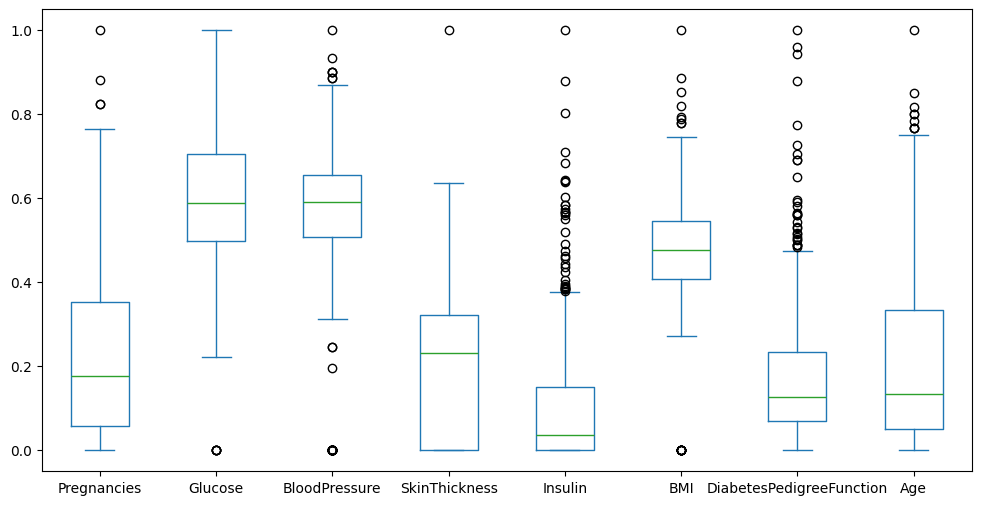

In [32]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6));

In [33]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


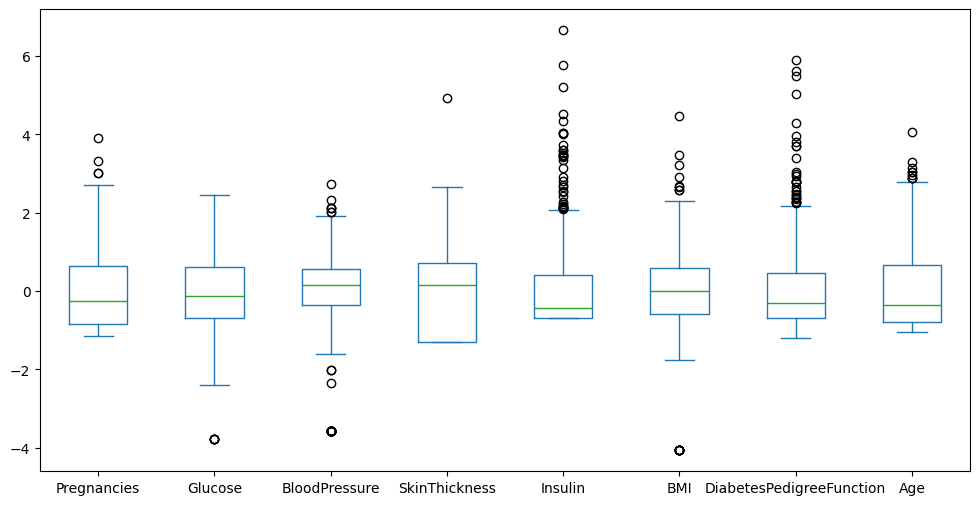

In [34]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

In [35]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [36]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 0.000e+00 0.000e+00 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 0.000e+00 0.000e+00 3.800e+01 5.3

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[6.000e+00 1.250e+02 7.600e+01 0.000e+00 0.000e+00 3.380e+01 1.210e-01
  5.400e+01]
 [7.000e+00 1.060e+02 6.000e+01 2.400e+01 0.000e+00 2.650e+01 2.960e-01
  2.900e+01]
 [1.000e+00 1.060e+02 7.000e+01 2.800e+01 1.350e+02 3.420e+01 1.420e-01
  2.200e+01]
 [0.000e+00 9.300e+01 1.000e+02 3.900e+01 7.200e+01 4.340e+01 1.021e+00
  3.500e+01]
 [7.000e+00 1.360e+02 9.000e+01 0.000e+00 0.000e+00 2.990e+01 2.100e-01
  5.000e+01]]
Output = [1. 1. 0. 0. 0.]
+ Test: shape=(231, 8)
Input = 
[[  6.    154.     78.     41.    140.     46.1     0.571  27.   ]
 [  1.    105.     58.      0.      0.     24.3     0.187  21.   ]
 [  1.    109.     60.      8.    182.     25.4     0.947  21.   ]
 [  8.     95.     72.      0.      0.     36.8     0.485  57.   ]
 [  2.    107.     74.     30.    100.     33.6     0.404  23.   ]]
Output = [0. 0. 0. 0. 0.]


In [38]:
# Lưu thông tin

save_dir = "exps/pima-indians-diabetes"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)
# Save encoders
joblib.dump(class_encoder, f'{save_dir}/class_encoder.joblib')

os.listdir(save_dir)

['class_encoder.joblib', 'data.npz', 'df_clean.xlsx']

In [39]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [40]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [41]:
joblib.load(f'{save_dir}/class_encoder.joblib').classes_

array([0, 1])

# Kết thúc